In [1]:
import os
import sys

In [2]:
path_dir = (os.path.dirname(os.getcwd()))
sys.path.append(path_dir)
    
from homecredit.data import HomeCredit
from homecredit.preparation import Preparation
from homecredit.cleaner import Cleaning
from homecredit.exploration import Exploration
from homecredit.model import Modeling

from homecredit.encoder import Encoder

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import pickle

# HomeCredit()

In [4]:
data = HomeCredit().get_data()

In [5]:
data.keys()

dict_keys(['test', 'train'])

In [6]:
data['train'].shape

(307511, 122)

In [7]:
data_home = HomeCredit().get_data()['train']
data_home.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data_home.shape

(307511, 122)

In [9]:
data_home['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [10]:
max(data_home['OWN_CAR_AGE'])

nan

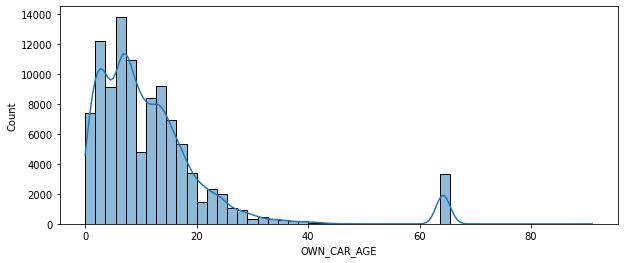

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 4))
sns.histplot(data_home['OWN_CAR_AGE'], kde=True, bins= 50);

In [12]:
data_home = data_home[data_home['CODE_GENDER'] != 'XNA'] # with gender = XNA
data_home = data_home[data_home['NAME_FAMILY_STATUS'] != 'Unknown'] # 'Unknown' status
# Remove entries with DAYS_EMPLOYED > 200_000
data_home = data_home[data_home['DAYS_EMPLOYED'] < 200_000]
data_home = data_home[data_home['AMT_ANNUITY'] < 150_000]
data_home = data_home[data_home['AMT_GOODS_PRICE'] < 2.5* 10**6]  

data_home['FLAG_OWN_CAR'].value_counts()

N    157417
Y     94337
Name: FLAG_OWN_CAR, dtype: int64

In [13]:
data_home = data_home[data_home['OWN_CAR_AGE'] < 80]
data_home['FLAG_OWN_CAR'].value_counts()

Y    94330
Name: FLAG_OWN_CAR, dtype: int64

# Preparation()

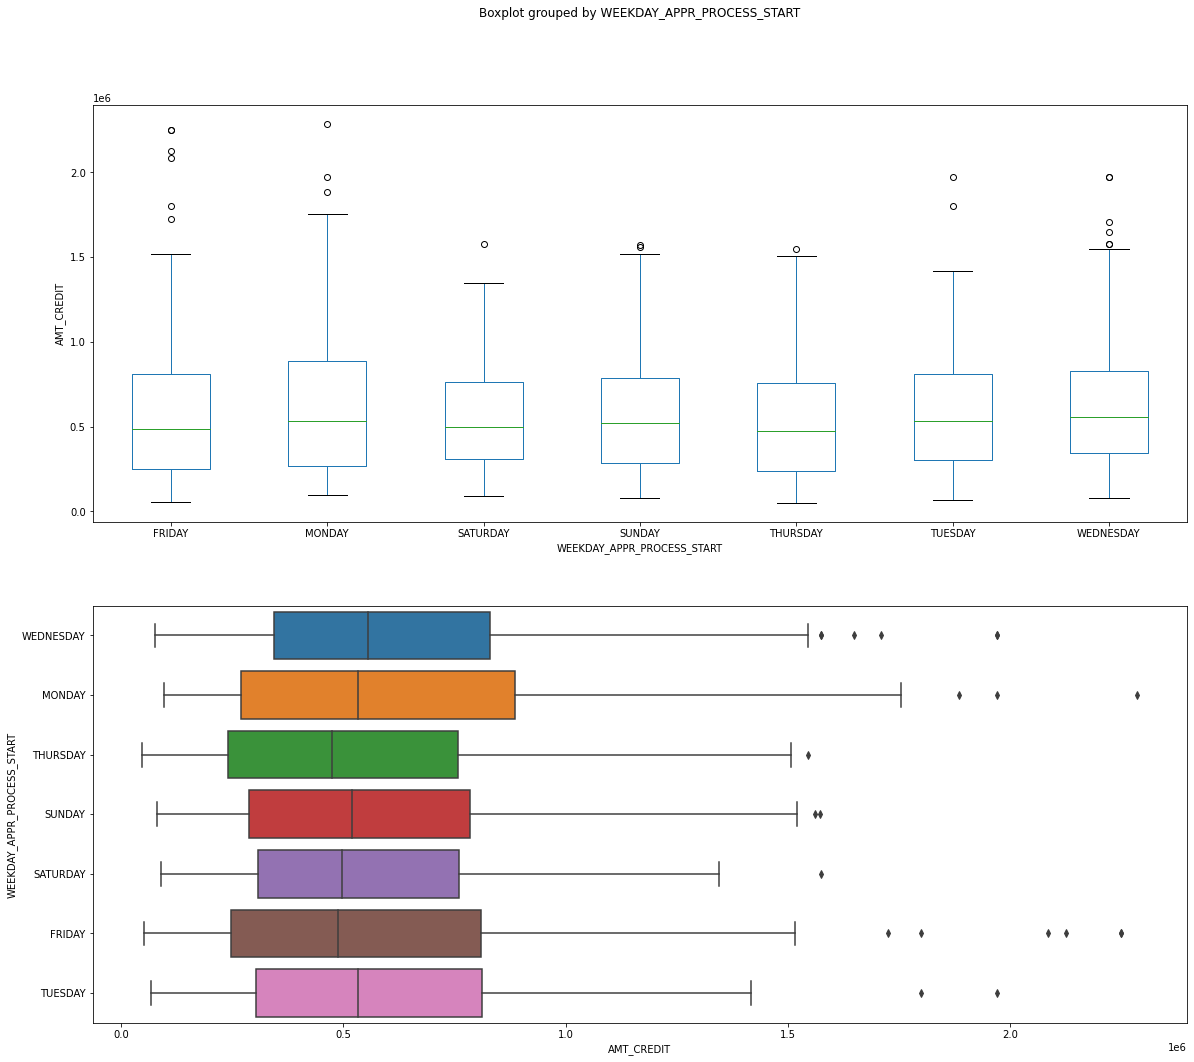

In [14]:
prep = Preparation()# by default : 'train'
prep.plot_num_cat_cols(numcol= "AMT_CREDIT", catcol="WEEKDAY_APPR_PROCESS_START", plot_type=0)

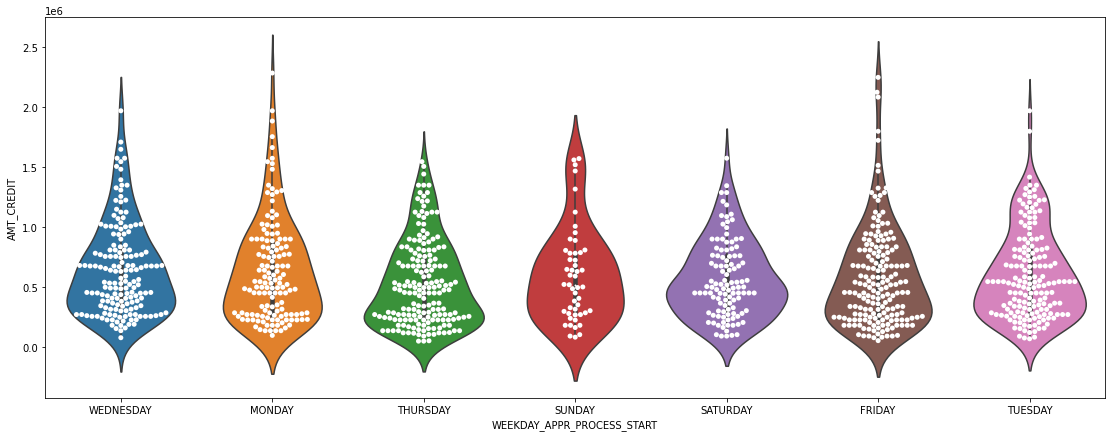

In [15]:
prep = Preparation()# by default : 'train'
prep.plot_num_cat_cols(numcol= "AMT_CREDIT", catcol="WEEKDAY_APPR_PROCESS_START")

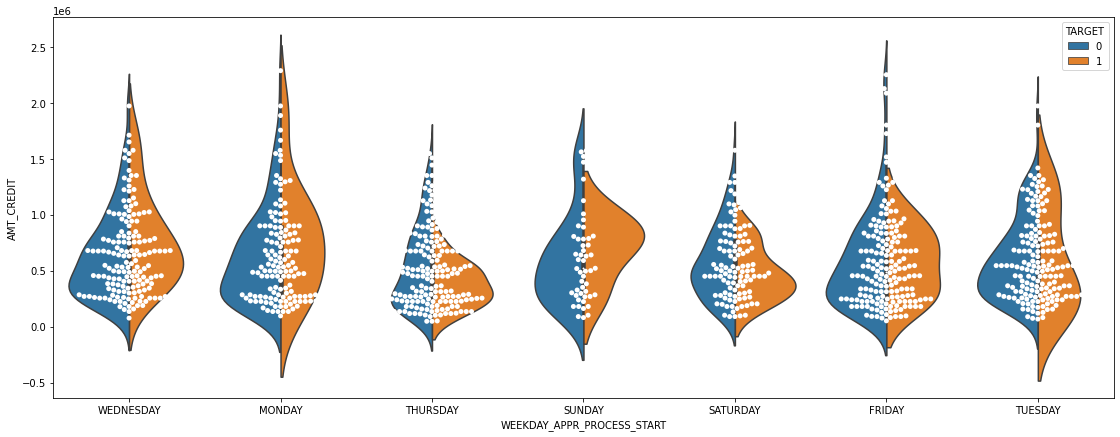

In [16]:
prep = Preparation()# by default : 'train'
prep.plot_num_cat_cols(numcol= "AMT_CREDIT", catcol="WEEKDAY_APPR_PROCESS_START", hue="TARGET")

**N.B : there is no target variable for application_test.csv (which is obvious)**

**therefore, if we want to "run plot_num_cat_cols" function for test data_set, hue is None**

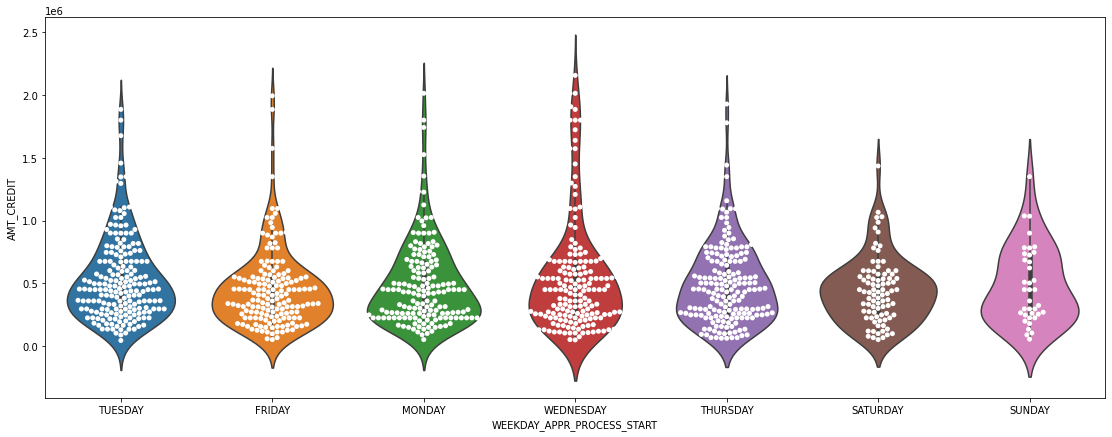

In [17]:
prep = Preparation('test')# by default : 'train'
prep.plot_num_cat_cols(numcol= "AMT_CREDIT", catcol="WEEKDAY_APPR_PROCESS_START")

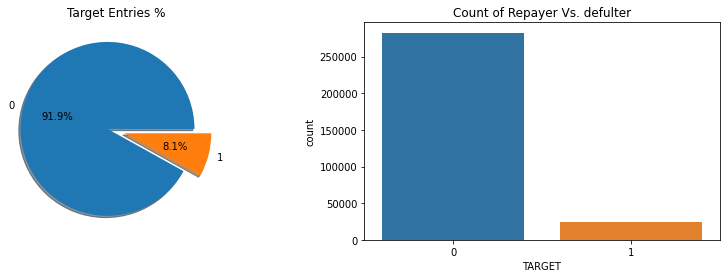

,TARGET
0,0.919271
1,0.080729


In [18]:
prep = Preparation()
prep.targetVar()

# Cleaning()

In [19]:
cl = Cleaning()

In [20]:
cl.prep.data_set

'train'

In [21]:
cl.prep.data['train'].head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
cl.data['train'].head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
cl.data['train'].shape

(307511, 122)

In [24]:
cl.remove_entries().shape

(251754, 122)

In [25]:
cl.remove_missvalues().shape

(251754, 122)

In [26]:
cl.data['train'].isnull().sum().sum()

9152465

In [27]:
cl.remove_missvalues().isnull().sum().sum()

0

In [28]:
cl.get_count_missvalues()

,0
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
...,...
NAME_HOUSING_TYPE,0
NAME_FAMILY_STATUS,0
NAME_EDUCATION_TYPE,0
NAME_INCOME_TYPE,0


/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Number of missing values,Percent
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
...,...,...
EXT_SOURCE_2,660,0.21
AMT_GOODS_PRICE,278,0.09
AMT_ANNUITY,12,0.00
CNT_FAM_MEMBERS,2,0.00


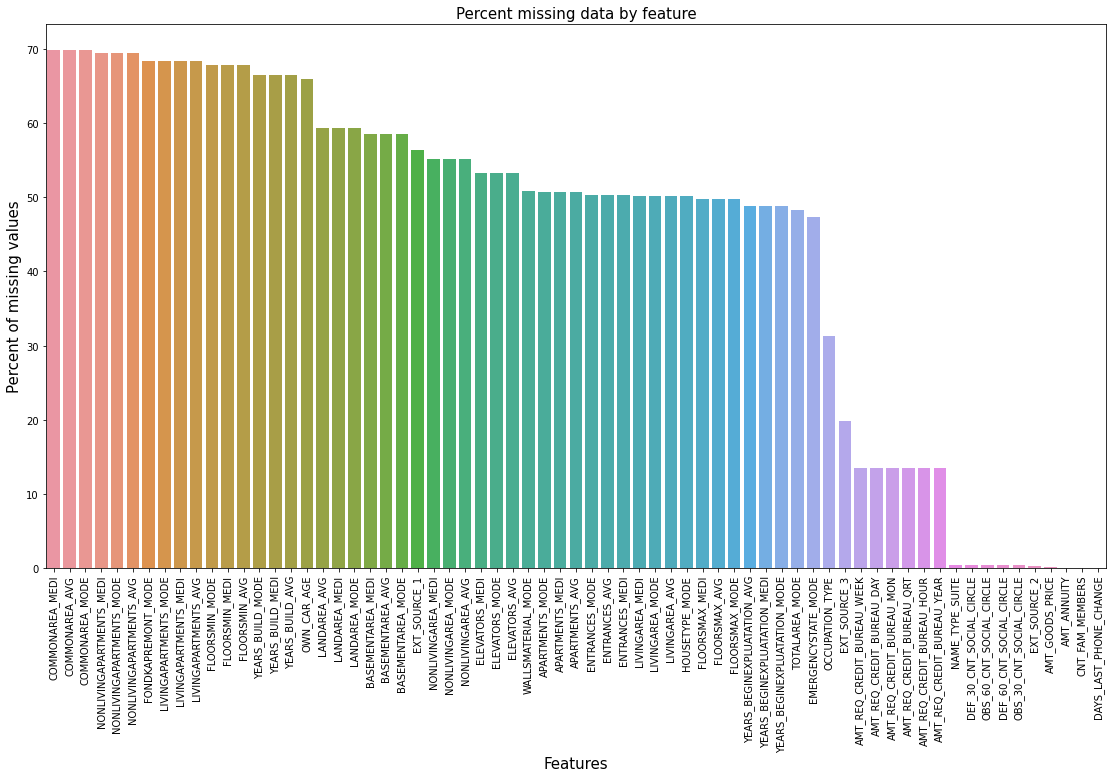

In [29]:
cl.plot_missvalues_table()

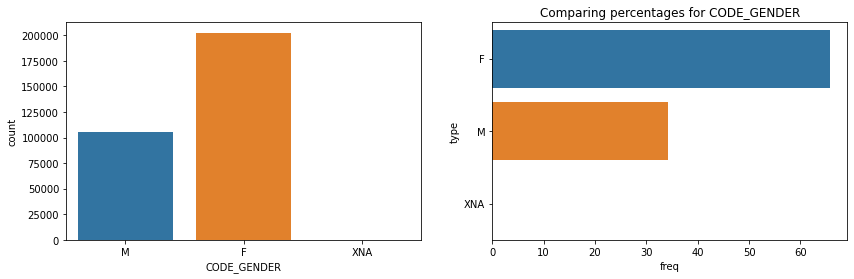

In [30]:
cl.prep.plot_catcols_single(col = "CODE_GENDER")

## Checking out the Cleaning() class when data_set = 'test'

In [31]:
tt = Cleaning()
tt.prep

In [32]:
tt.prep.__dict__.keys()

dict_keys(['data_set', 'data'])

In [33]:
tt.prep.data_set = 'test'

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Number of missing values,Percent
COMMONAREA_MODE,33495,68.72
COMMONAREA_MEDI,33495,68.72
COMMONAREA_AVG,33495,68.72
NONLIVINGAPARTMENTS_MEDI,33347,68.41
NONLIVINGAPARTMENTS_AVG,33347,68.41
...,...,...
OBS_60_CNT_SOCIAL_CIRCLE,29,0.06
DEF_30_CNT_SOCIAL_CIRCLE,29,0.06
OBS_30_CNT_SOCIAL_CIRCLE,29,0.06
AMT_ANNUITY,24,0.05


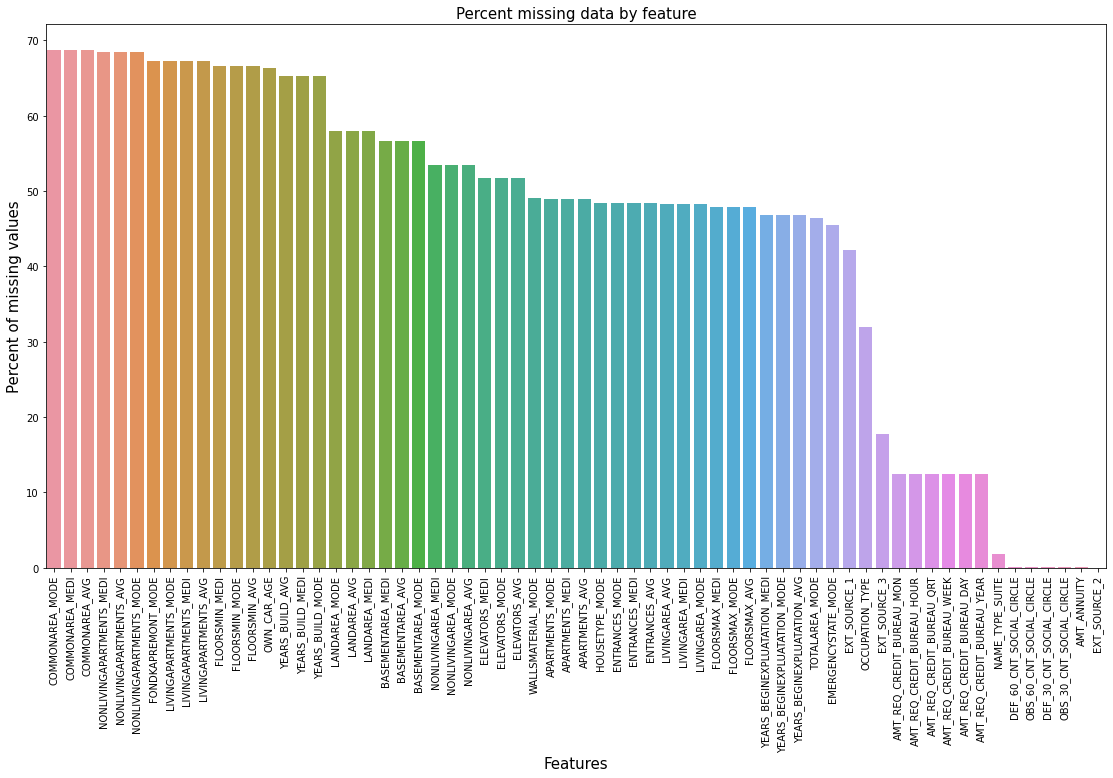

In [34]:
tt.plot_missvalues_table()

In [35]:
tt.remove_missvalues().head(2)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [36]:
tt.prep.data[tt.prep.data_set].isnull().sum().sum()

1404419

In [37]:
tt.remove_missvalues().isnull().sum().sum()

0

In [38]:
tt.remove_missvalues().head(2)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


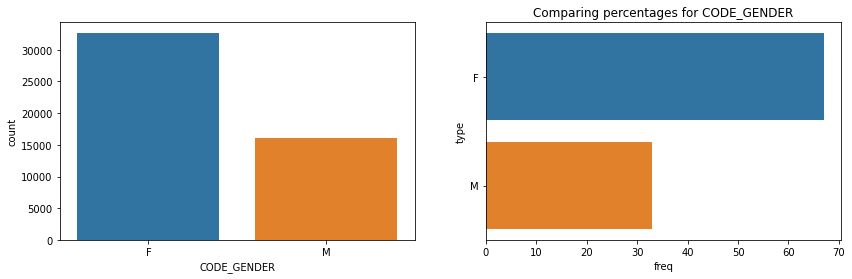

In [39]:
tt.prep.plot_catcols_single(col = "CODE_GENDER")

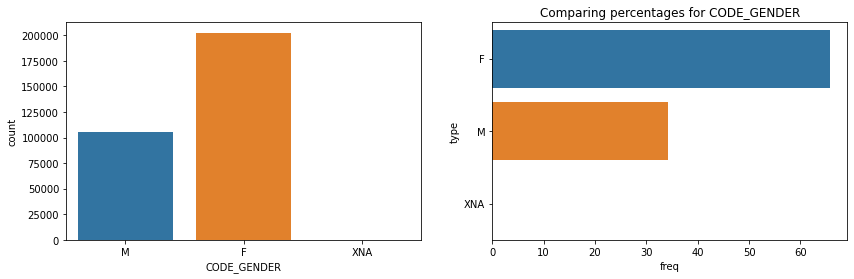

In [40]:
cl.prep.plot_catcols_single(col = "CODE_GENDER")# train data_set

# Exploration()

In [41]:
ex = Exploration()

In [42]:
ex.cl.remove_entries().shape

(251754, 122)

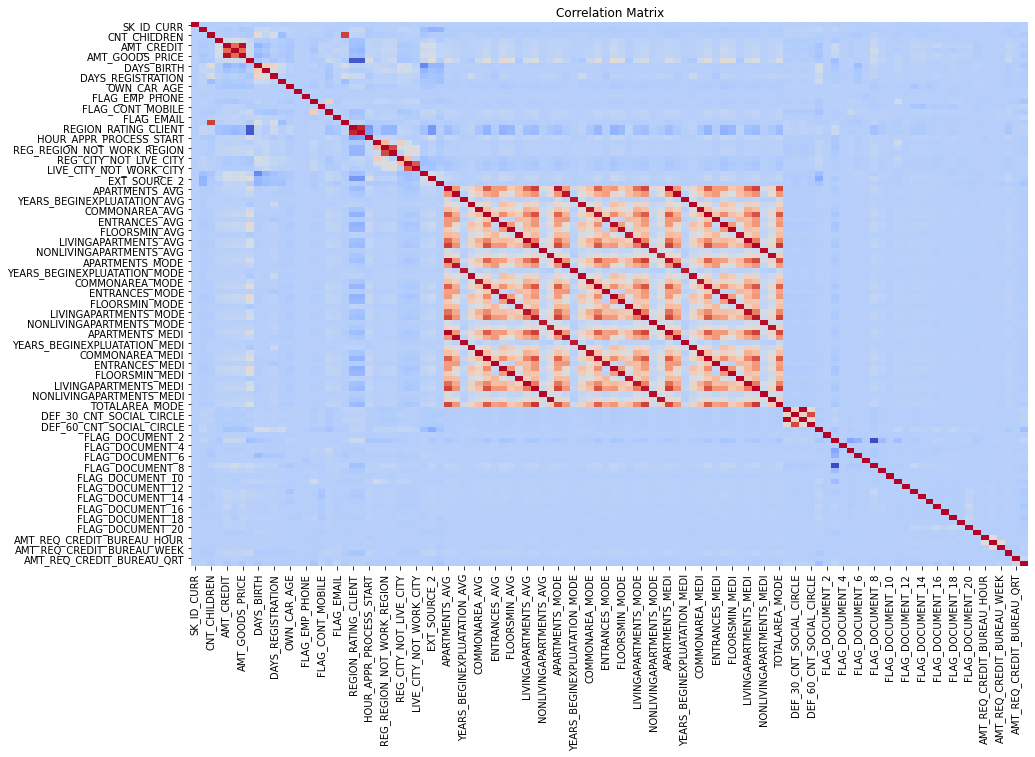

In [43]:
ex.plot_correlation()

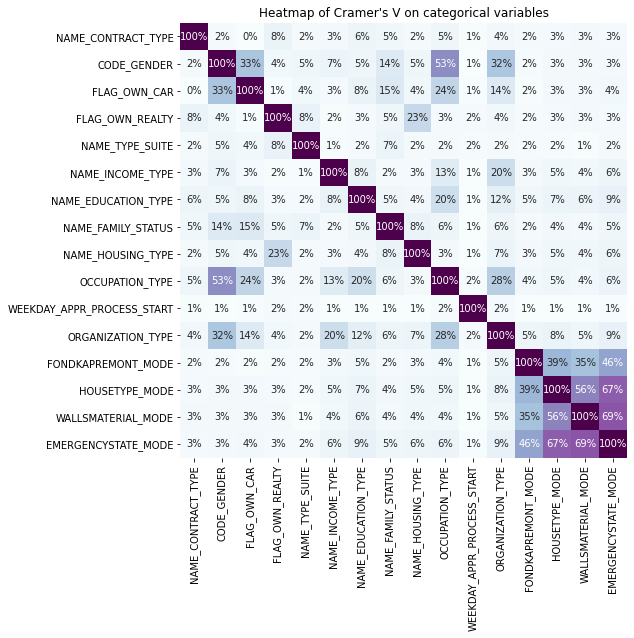

In [44]:
ex.plot_heatmapCramerV()

In [45]:
ex.__dict__.keys()

dict_keys(['prep', 'cl', 'data'])

In [46]:
ex.data.shape

(251754, 122)

In [47]:
ex.prep.data_set

'train'

In [48]:
ex.cl.prep.data_set

'train'

In [49]:
ex.cl.get_count_missvalues()

,0
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
...,...
NAME_HOUSING_TYPE,0
NAME_FAMILY_STATUS,0
NAME_EDUCATION_TYPE,0
NAME_INCOME_TYPE,0


*if we want to make an exploration analysis on another data*
- Here , for example : application_test.csv 

In [50]:
EX = Exploration(data_set='test')
EX.cl.prep.data_set #= 'test'

'test'

In [51]:
EX.prep.data_set# = 'test'

'train'

In [52]:
EX.cl.get_count_missvalues()

,0
COMMONAREA_AVG,33495
COMMONAREA_MODE,33495
COMMONAREA_MEDI,33495
NONLIVINGAPARTMENTS_AVG,33347
NONLIVINGAPARTMENTS_MODE,33347
...,...
NAME_HOUSING_TYPE,0
NAME_FAMILY_STATUS,0
NAME_EDUCATION_TYPE,0
NAME_INCOME_TYPE,0


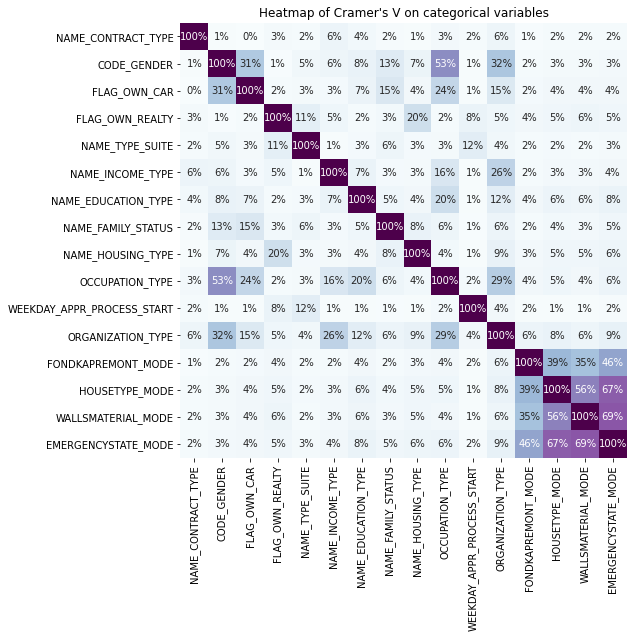

In [53]:
EX.plot_heatmapCramerV()

# Encoder()

In [4]:
en = Encoder()

In [5]:
en.data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
encoded_df = en.execute()
encoded_df.head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,No,Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0


In [7]:
encoded_df.head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,No,Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0


In [8]:
EN = Encoder(data_set='test')

In [9]:
EN.data.head(2)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [10]:
en = Encoder()
(encoded_df_train, encoded_df_pred) = en.execute(data_topredict=True)
encoded_df_train.head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,No,Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0


In [11]:
encoded_df_pred.head(2)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,No,Yes
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0,0,0,0,0,0


# Train and save the model

In [4]:
ml = Modeling()

In [5]:
ml.data.shape

(251754, 242)

In [6]:
ml.data.head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,No,Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0


In [7]:
ml.data.isnull().sum().sum()

0

In [8]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
#models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('DTC', DecisionTreeClassifier()))

In [9]:
dic = ml.execute(models)

Model:  LR  scoring: accuracy  train score 0.9134809092893548 time_run (mins) 2.852945601940155
Model:  DTC  scoring: accuracy  train score 0.8442406603005219 time_run (mins) 7.018933931986491


In [10]:
dic

[{'Name ': 'LR',
  'Model ': LogisticRegression(max_iter=1000),
  ' scoring': 'accuracy',
  ' train score': 0.9134809092893548,
  'time_run (mins)': 2.852945601940155},
 {'Name ': 'DTC',
  'Model ': DecisionTreeClassifier(),
  ' scoring': 'accuracy',
  ' train score': 0.8442406603005219,
  'time_run (mins)': 7.018933931986491}]

In [11]:
ml.predict_test_score(LogisticRegression(max_iter=1000))

0.9143617514266421

# Load models from pickle file

In [12]:
# Load model from pickle file
my_model = pickle.load(open("models.pckl","rb"))

my_model#.score(X_test_sc, y_test)

[{'Name ': 'LR',
  'Model ': LogisticRegression(max_iter=1000),
  ' scoring': 'accuracy',
  ' train score': 0.9134809092893548,
  'time_run (mins)': 2.852945601940155},
 {'Name ': 'DTC',
  'Model ': DecisionTreeClassifier(),
  ' scoring': 'accuracy',
  ' train score': 0.8442406603005219,
  'time_run (mins)': 7.018933931986491}]